<a href="https://colab.research.google.com/github/TimkaThymineTimiryazevskaya/sf_data_science/blob/main/SGA_unit6_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('spam_or_not_spam.zip')
print(df.head())
print(df.shape)

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0
(3000, 2)


In [28]:
df['label'].value_counts(normalize = True)

0    0.833333
1    0.166667
Name: label, dtype: float64

<Axes: xlabel='label', ylabel='Count'>

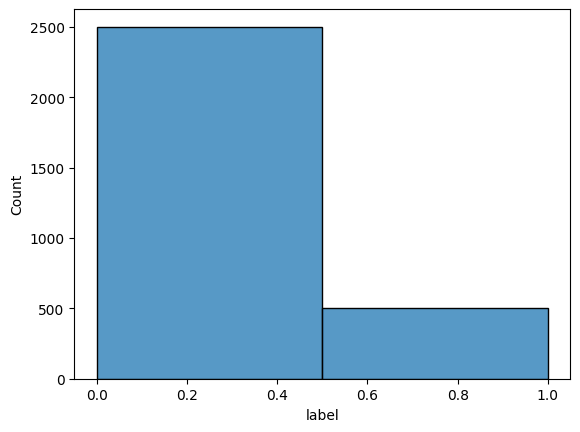

In [29]:
sns.histplot(df['label'], binwidth = 0.5)

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [38]:
df = df.replace(r'^\s*$', np.nan, regex=True)
data = df.dropna(axis = 0)
df.shape

(2997, 2)

Переводим данные в векторный вид:

In [39]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [41]:
print(X.shape)

(2997, 34116)


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [42]:
y = data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [45]:
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [46]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)



Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [62]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"F1_score:{f1_score(y_test, y_test_pred)}")
print(f"Recall:{recall_score(y_test, y_test_pred)}")

Accuracy: 0.9866666666666667
F1_score:0.9579831932773109
Recall:0.9193548387096774


Нарисуйте ROC-кривую:

Text(0, 0.5, 'True Positive Rate')

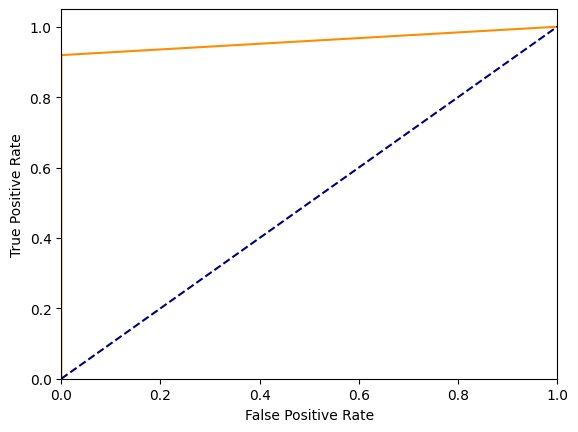

In [63]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
fpr, tpr, treshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [68]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
clf001 = MultinomialNB(alpha = 0.01)
clf001.fit(X_train, y_train)
scores001 = cross_val_score(clf001, X_train, y_train, cv=10, scoring='accuracy')
clf01 = MultinomialNB(alpha = 0.1)
clf01.fit(X_train, y_train)
scores01 = cross_val_score(clf01, X_train, y_train, cv=10, scoring='accuracy')
clf05 = MultinomialNB(alpha = 0.5)
clf05.fit(X_train, y_train)
scores05 = cross_val_score(clf05, X_train, y_train, cv=10, scoring='accuracy')
print('Accuracy при alpha = 0.01:', scores001.mean())
print('Accuracy при alpha = 0.1:',scores01.mean())
print('Accuracy при alpha = 0.5:',scores05.mean())

Accuracy при alpha = 0.01: 0.9893214285714287
Accuracy при alpha = 0.1: 0.9906547619047619
Accuracy при alpha = 0.5: 0.9902083333333334


Да, от параметра alpha зависит качество классификации. В трех предложенных вариантах значений 0.01, 0.1, 0.5 данного параметра Accuracy дает разное среднее значение